In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import gridspec
import argparse
import h5py as h5
import os
import utils
import tensorflow as tf
from GSGM import GSGM
from GSGM_distill import GSGM_distill
import time
import gc
import sys
from scipy.stats import wasserstein_distance
from plot_class import PlottingConfig

In [2]:
def generate_jets(batch_size, jet_feature_dim):
    return tf.concat([tf.random.normal([batch_size // 2, jet_feature_dim], mean = 3., stddev = 1.5),
                      tf.random.normal([batch_size // 2, jet_feature_dim], mean = -3., stddev = 1.5)], axis = 0)

In [3]:
config = utils.LoadJson('gaussian_config_jet.json')
model_name = config['MODEL_NAME']
sample_name = model_name

particle_count = 1

model = GSGM(config = config, npart = particle_count)

checkpoint_folder = '../checkpoints_{}/checkpoint'.format(model_name)
model.load_weights('{}'.format(checkpoint_folder)).expect_partial()

2023-04-24 14:50:35.286040: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 14:50:37.155866: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 37014 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:03:00.0, compute capability: 8.0
2023-04-24 14:50:37.157508: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38218 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2023-04-24 14:50:37.159094: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

In [6]:
jets_gen = []

for i in range(10):
    p, j = model.generate(tf.ones([32, 1]), None)
    jets_gen.append(j)

jets_gen = np.concatenate(jets_gen)
print(jets_gen.shape)

Time for sampling 32 events is 0.13243651390075684 seconds


FileNotFoundError: [Errno 2] No such file or directory: 'preprocessing_1.json'

TypeError: list indices must be integers or slices, not tuple

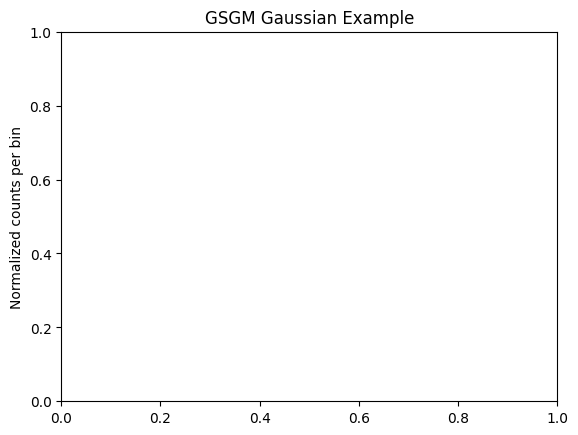

In [5]:
jets_data = generate_jets(32 * 10, 1)

plt.title('GSGM Gaussian Example')
plt.ylabel('Normalized counts per bin')
plt.hist(jets_gen[:, 0], 100, range = (-8, 8), density = True, alpha = 0.5, label = 'Model output')
plt.hist(jets_data[:, 0], 100, range = (-8, 8), density = True, alpha = 0.5, label = 'Data')
plt.legend()
plt.show()